# INDIVIDUAL ID : PTID - CDS - MAR - 24 - 1856

# BATCH ID : 30 - OCT - 23 - CDS - BUN - 021 - WDM11 - BAN

# PROJECT : PRCP - 1025 - FLIGHT PRICE PREDICTION

# BUSSINESS CASE :

We have to analyzing the flight fare prediction of data using a machine learning concept and using essential exploratory data analysis techniques then after we will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more.

# PROBLEM STATEMENT :

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

- Task 1:-Prepare a complete data analysis report on the given data.

    
- Task 2:-Create a predictive model which will help the customers to predict future flight
          prices and plan their journey accordingly.

# Domain Analysis :

1. **Data Shape** : 

-   The data has 10 quantitative input varaibles and 1 quantitative varaibale. i.e 10683instances(observations).

2. **Categorical_columns** : 

-   Airline, Source , Destination , Route ,Additional_Info.

3. **Date&Time_columns** :

-   Date_of_journey , Dep_Time , Arrival_Time , Duration .

4. **Numerical_columns** : 

-   Total_stops , Price .    M

# Data Attributes :

1. **Airline** :
-  So this column will have all the types of airlines like Indigo, Jet Airways,Air India, and many more.


2. **Date_of_Journey** : 
-  This column will let us know about the date on which thepassenger’s journey will start.


3. **Source** : 
-  This column holds the name of the place from where the passenger’sjourney will start.


4. **Destination** : 
-  This column holds the name of the place to where passengerswanted to travel.


5. **Route** : 
-  Here we can know about what the route is through which passengershave opted to travel from his/her source to their destination.


6. **Arrival_Time** :
-  Arrival time is when the passenger will reach his/her destination.


7. **Dep_Time** :
-  Departure time is when the passenger will attend his/her flight.


8. **Duration** :
-  Duration is the whole period that a flight will take to complete itsjourney from source to destination.


9. **Total_Stops** :
-  This will let us know in how many places flights will stop there forthe flight in the whole journey.


10. **Additional_Info** : 
-  In this column, we will get information about food, kind of food,and other amenities.


11. **Price** :
-  Price of the flight for a complete journey including all the expensesbefore onboarding.


# PROJECT PROCESS STEPS :

- 1.IMPORTING ALL THE NECESSASRY LAIBRARIES

- 2.UNDERSTANDING THE DATA / INSIGHTS FROM DATA

- 3.EXPLORATARY DATA ANALYSIS (EDA)

- 4.DATA PRE-PROCESSING

- 5.FEATURE SELECTION

- 6.MODEL CREATION AND EVALUATION

- 7.CONCLUSION

# IMPORTING ALL THE NECESSARY LAIBRARIES

In [1]:
# Import laibraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
pwd

'C:\\Users\\dell'

# Understanding The Data

In [3]:
# Loading the data
flight_data = pd.read_excel("Flight_Fare.xlsx")
flight_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# BASIC CHECKS

In [4]:
flight_data.head()     # To check first five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_data.tail()     # To check last five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
flight_data.shape      # To check rows and columns

(10683, 11)

In [7]:
flight_data.columns    # To check the column names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
flight_data.dtypes    # To check the data type of columns

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
flight_data.describe()   # shows the mean,std,min,25%,50%,75% of numerical columns

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
flight_data.describe(include = "O")    # shows the unique,mode,mode_frequency of categorical data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [11]:
flight_data.info()       # To check the information of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# EXPLORATARY DATA ANALYSIS  (E.D.A)

In [12]:
# creating of new column for journey day
flight_data["journey_day"] = pd.to_datetime(flight_data["Date_of_Journey"], format="%d/%m/%Y").dt.day

# creating of new column for journey month
flight_data["journey_month"] = pd.to_datetime(flight_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

# since we have converted Date_of_Journey column into integers, Now we can drop as is of no use.
flight_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
flight_data.head()       # flight_data after creating new columns

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
# Departure time is when a plane leaves the runway.
# similar to Date_of_Journey we can extract the values from Dep_Time

#Extacting Hours
flight_data["Dep_hour"] = pd.to_datetime(flight_data["Dep_Time"]).dt.hour

#Extracting Minutes
flight_data["Dep_min"] = pd.to_datetime(flight_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
flight_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [15]:
flight_data.head()       # flight_data after creating new columns

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
# Arrival time is when the plane pull up to the runway
# Similar to Date_of_Journey we can extract values from arrival_Time

# Extracting Hour
flight_data["Arrival_hour"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.hour

# Extracting Minutes
flight_data["Arrival_min"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
flight_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [17]:
flight_data.head()      # flight_data after creating new columns

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Time taken by plane to reach destination is called Duration
# It is the difference between Departure Time and Arrival Time

# Assigning and Converting Duration column into list
duration = list(flight_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:                                            #Check if duration contains only hour or minutes
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m "                          # Add 0 minute 
        else:
            duration[i] = " 0h " + duration[i]                                  # Add 0 hour
            
duration_hours = [] 
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))                 # Extract hours from duration
    duration_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extract only minutes from duration
            

In [19]:
# Adding duration_hours and duration_minutes list to data dataframe

flight_data["Duration_hours"] = duration_hours
flight_data["Duration_minutes"] = duration_minutes

In [20]:
flight_data.head()     # flight_data after creating new columns

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [21]:
flight_data.drop(["Duration"], axis = 1, inplace = True)

In [22]:
flight_data.head()   # flight_data after creating new columns

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Univariate Analysis

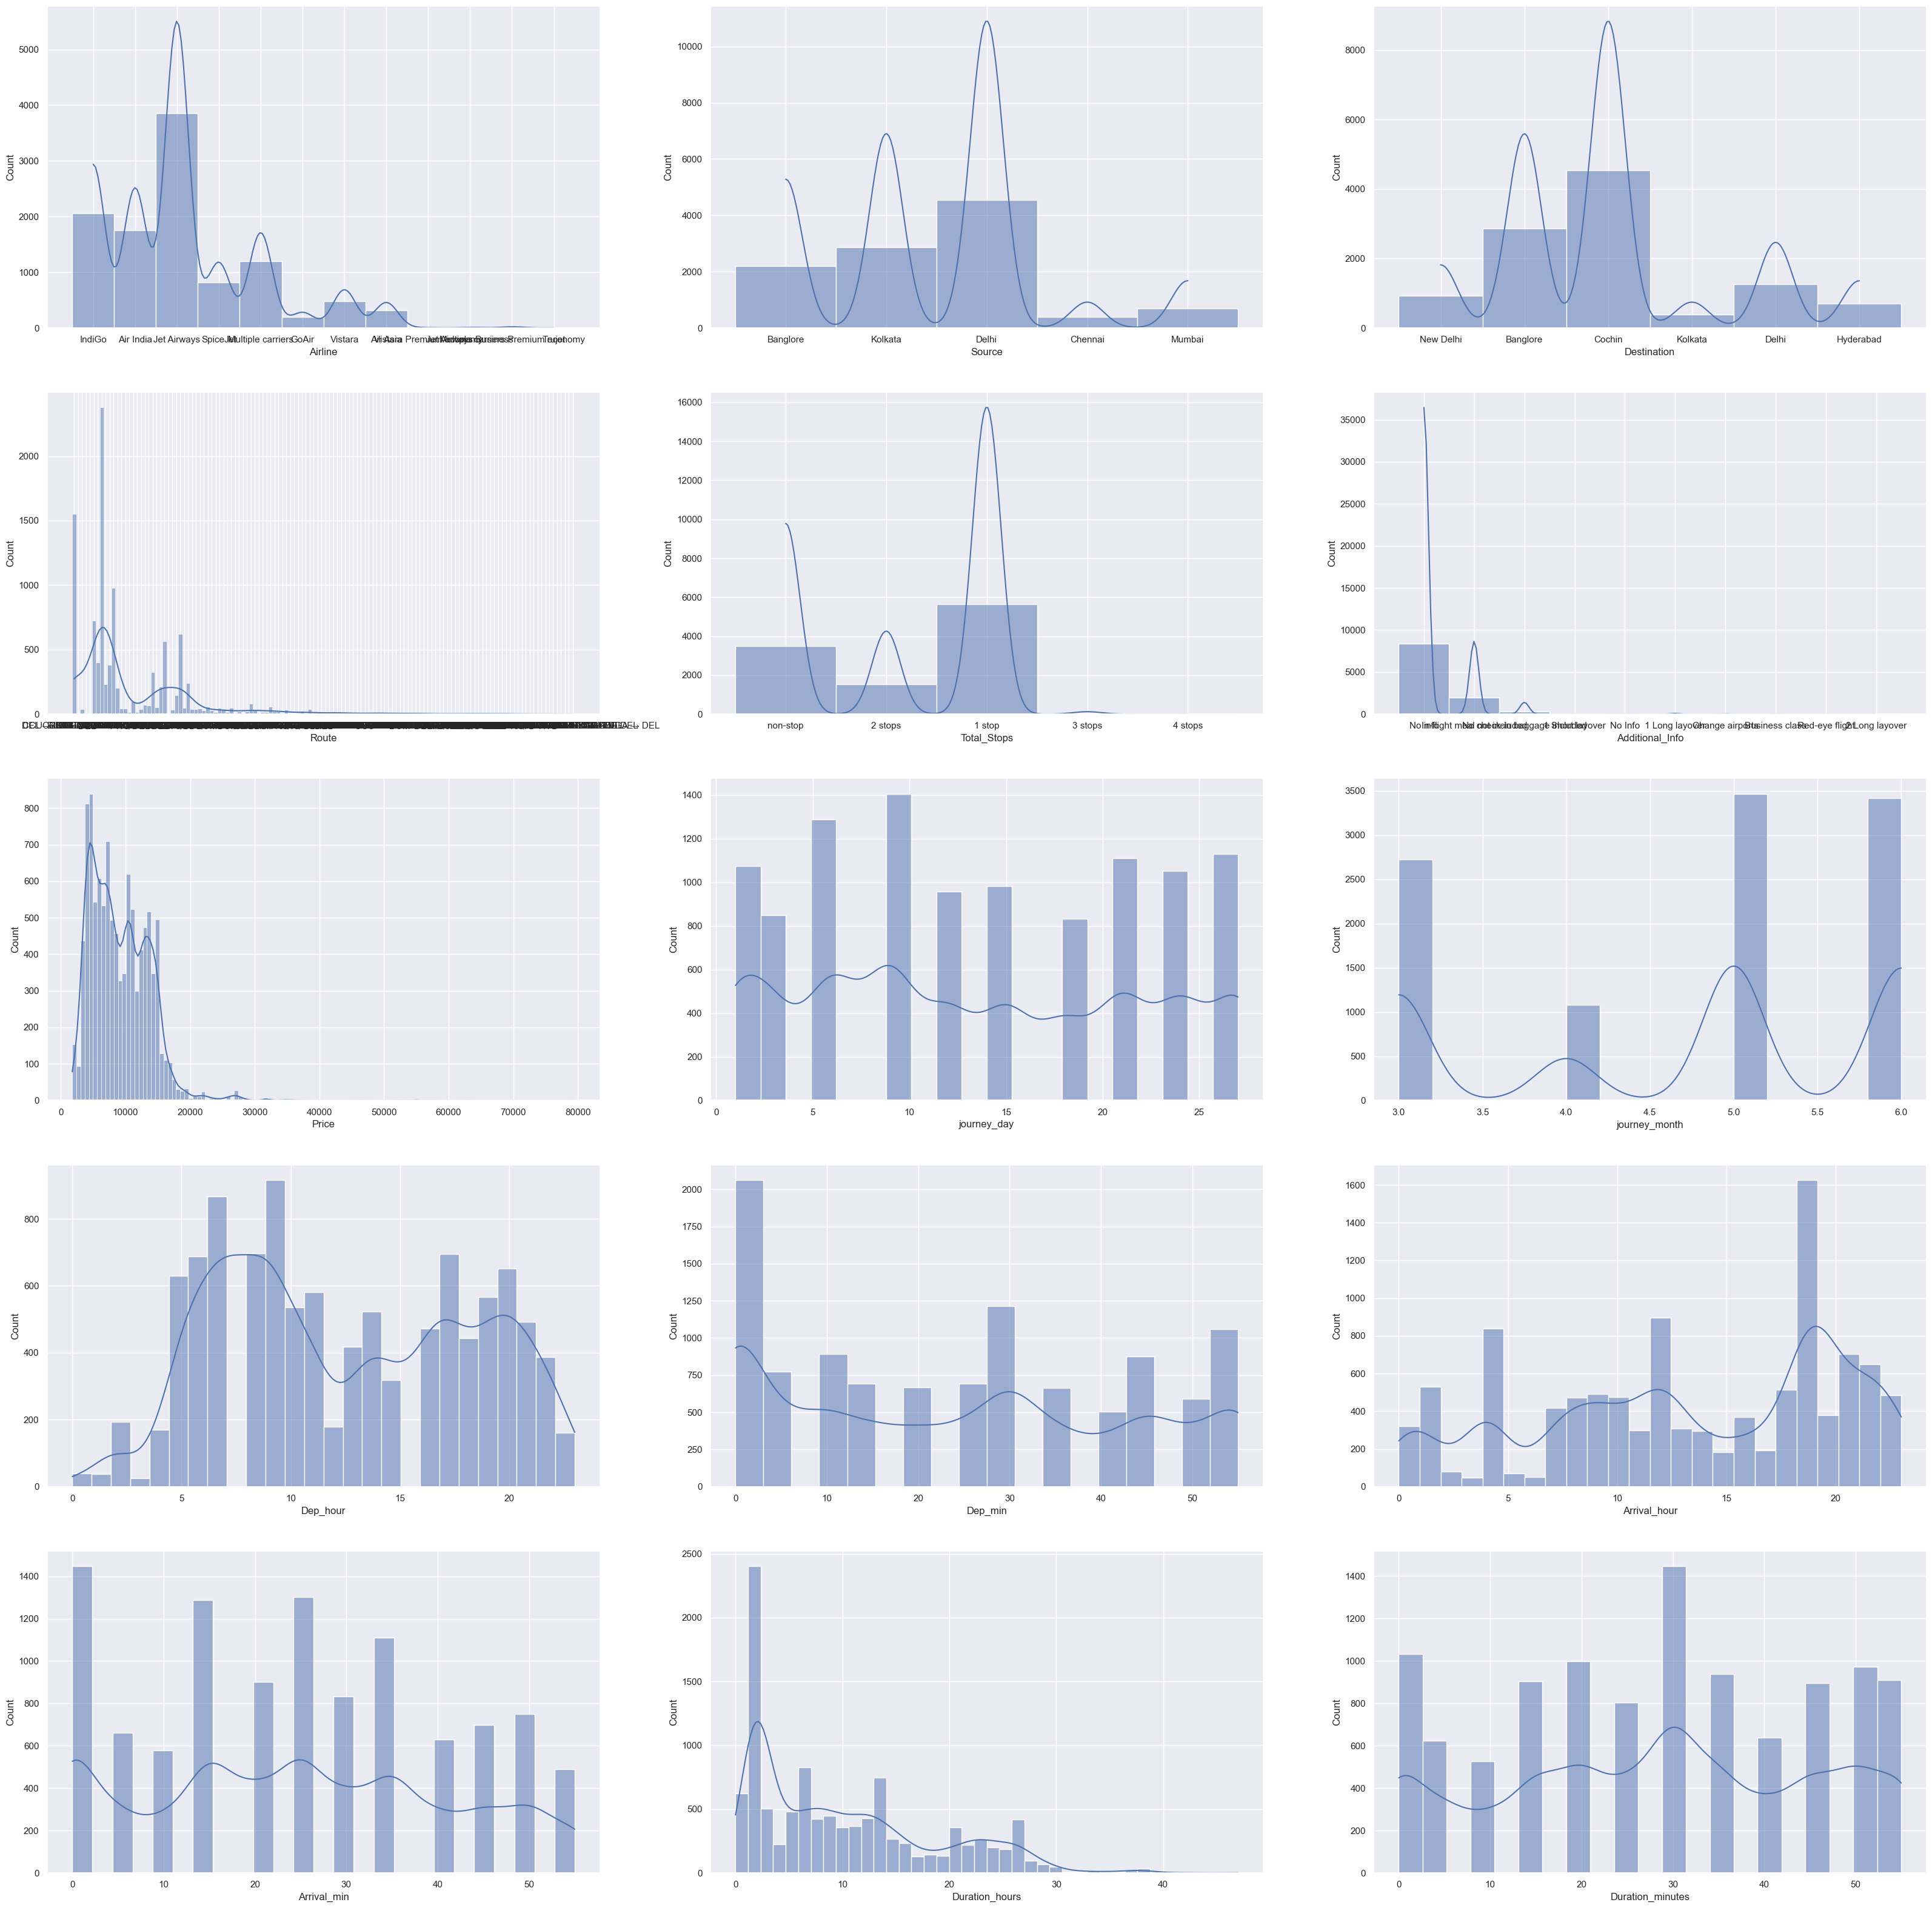

In [23]:
plt.figure(figsize = (40,40), facecolor="white")
pltno = 1

for col in flight_data:
  if pltno<=15:
    ax = plt.subplot(5,3,pltno)
    sns.histplot(x = flight_data[col], kde = True)
  pltno+=1

plt.show()

**INSIGHTS**

1. There are more datapoints in JetAirways followed by Indigo & AirIndia.
2. From Delhi the more number of flights has taken off followed by Kolkata & Banglore.
3. The Cochin has more arrivals followed by Banglore & Delhi.
4. Mostly the flights are connecting and it has one stop followed by direct & 2 stop flights.
5. We can see most of the flights were operating in the month of may & june.
6. The flights with 2 hours duration are more when compared to the other flying hours.

## Bivariant Analysis

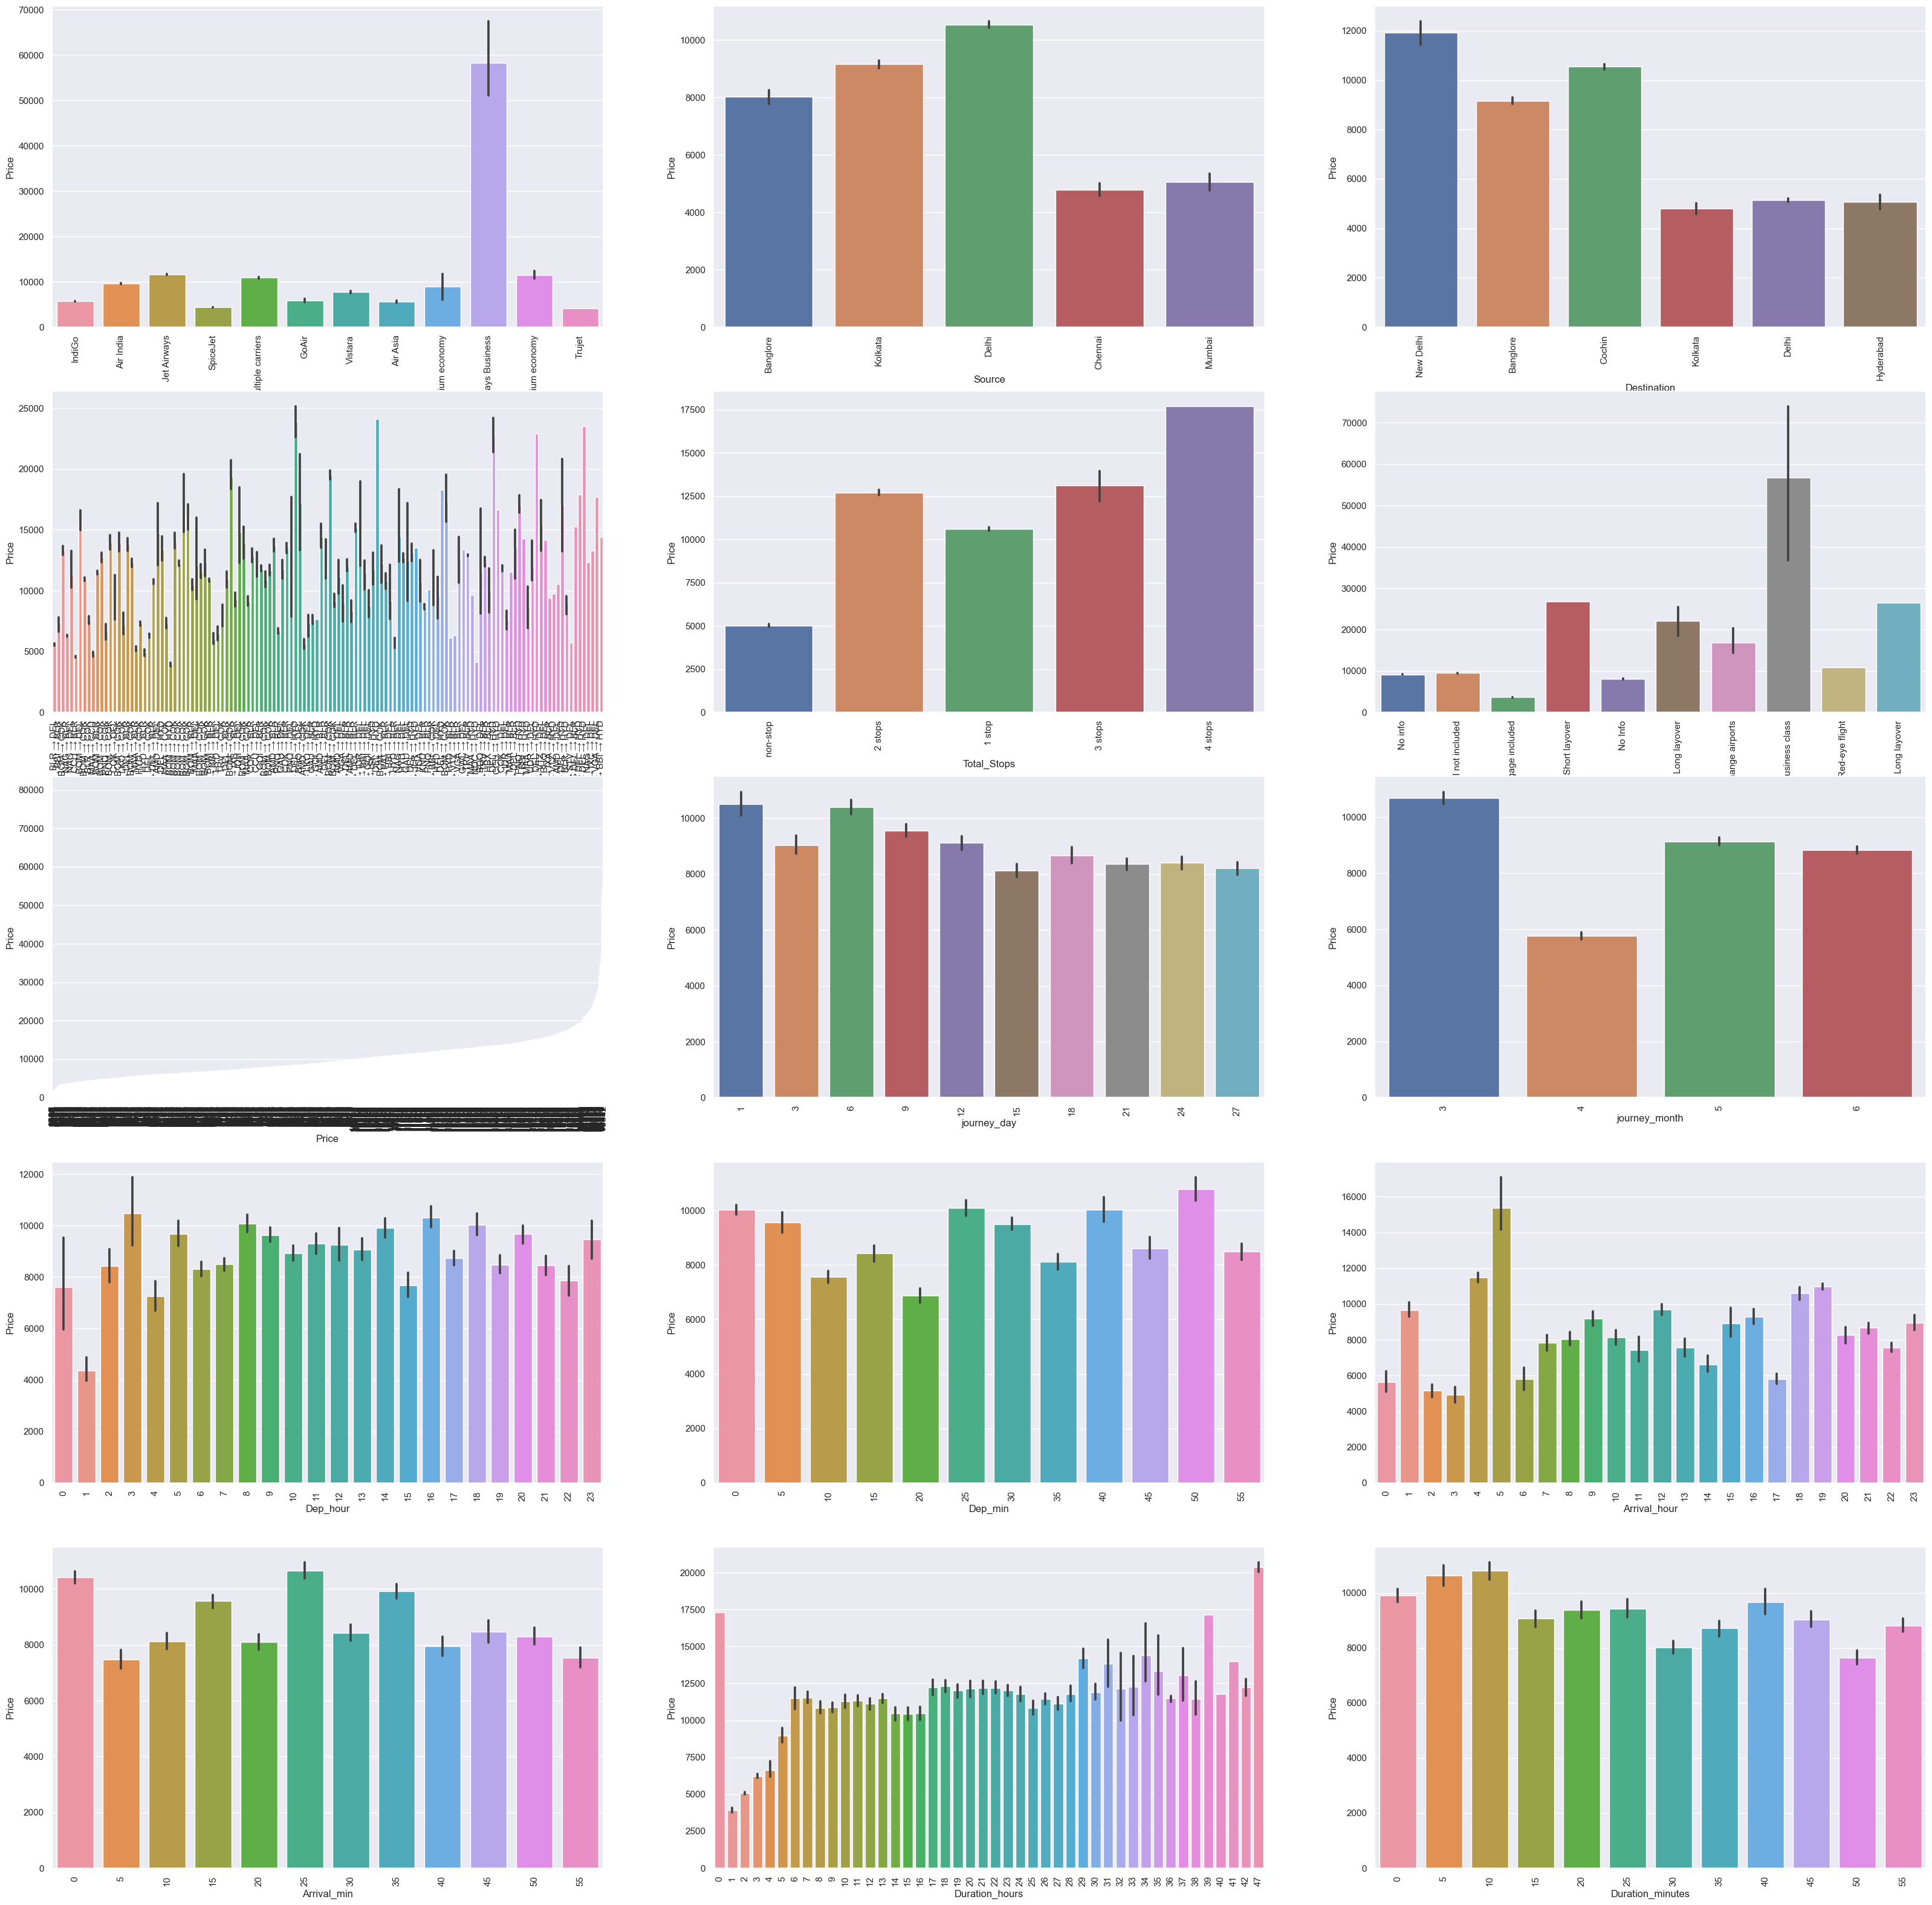

In [24]:
plt.figure(figsize=(40,40),facecolor='white')
pltno=1

for col in flight_data:
  if pltno<=15:
    ax=plt.subplot(5,3,pltno)
    sns.barplot(x=flight_data[col],y=flight_data['Price'])
    plt.xticks(rotation='vertical')
  pltno+=1

plt.show()

**INSIGHTS**

1. For all the airlines the flight fares are almost similar for economy class except for the jet airways business class.
2. Flights flying from Delhi, Kolkata & Banglore are almost double compared to Chennai & Mumbai.
3. Flights with 4 stops have higher fare when compared to other flights.
4. Flights in the month of April have cheaper fares when compared to other months.
5. Flights with 47 flying hours are costlier compared to other time duration.

## Multivariant Analysis

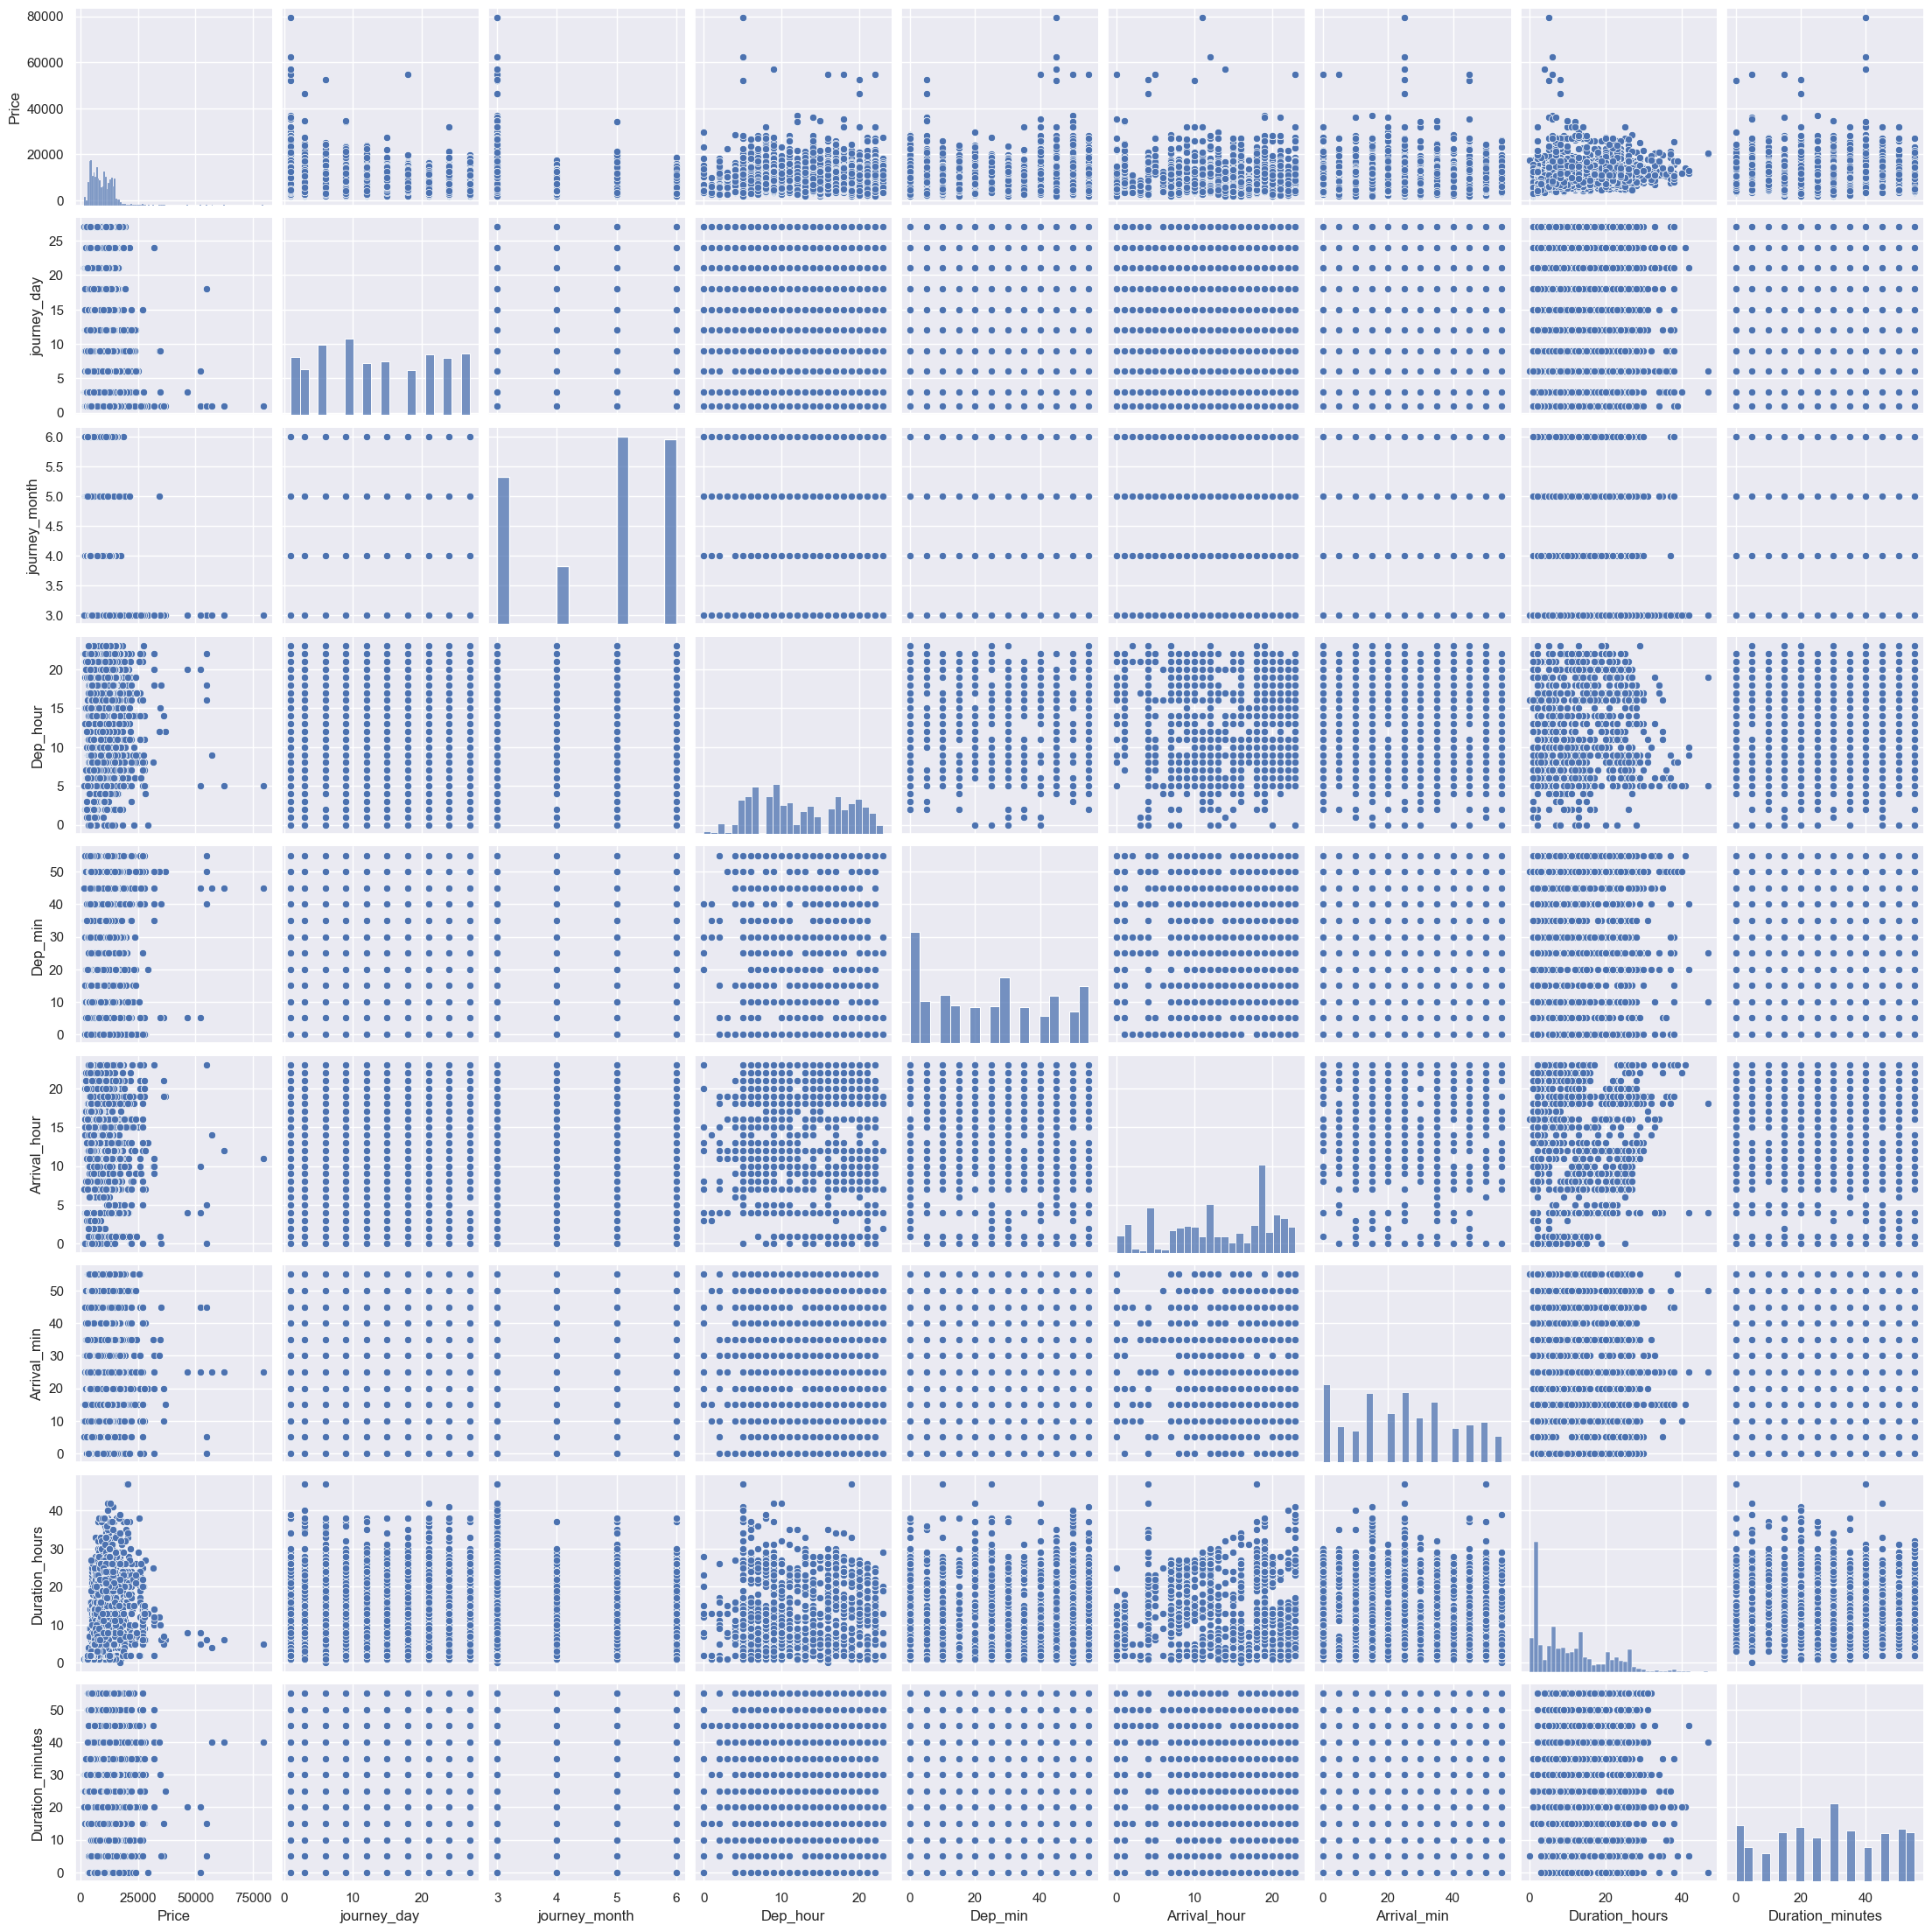

In [25]:
sns.pairplot(flight_data)

plt.show()

# DATA PRE-PROCESSING

In [26]:
# Additional_Info Contains Almost 80% no_info
# Route and Total_Stops are related to each other

flight_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#### CHECK FOR MISSING VALUES

In [27]:
flight_data.isnull().sum()     # To check for null values

Airline             0
Source              0
Destination         0
Total_Stops         1
Price               0
journey_day         0
journey_month       0
Dep_hour            0
Dep_min             0
Arrival_hour        0
Arrival_min         0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [28]:
flight_data.dropna(inplace = True)      # dropping of null value

In [29]:
flight_data.isnull().sum()              # To check for null values     

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
journey_day         0
journey_month       0
Dep_hour            0
Dep_min             0
Arrival_hour        0
Arrival_min         0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [30]:
flight_data.duplicated().sum()         # to check for duplicated values

222

In [31]:
flight_data.drop_duplicates(inplace=True)       # Dropping of duplicate values

In [32]:
flight_data.duplicated().sum()         # to check for duplicated values

0

## Encoding of categorical data

In [33]:
flight_data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [34]:
flight_data['Airline'] = flight_data['Airline'].map({'IndiGo':0, 'Air India':1, 'Jet Airways':2, 'SpiceJet':3,
                                                     'Multiple carriers':4, 'GoAir':5, 'Vistara':6, 'Air Asia':7,
                                                     'Vistara Premium economy':8, 'Jet Airways Business':9,
                                                     'Multiple carriers Premium economy':10, 'Trujet':11})

In [35]:
flight_data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [36]:
flight_data["Source"] = flight_data["Source"].map({"Banglore":0, "Kolkata":1, "Delhi":2, "Chennai":3, "Mumbai":4})

In [37]:
flight_data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [38]:
flight_data["Destination"] = flight_data["Destination"].map({"New Delhi":0, "Banglore":1, "Cochin":2, "Kolkata":3, "Delhi":0, "Hyderabad":5})

In [39]:
flight_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
flight_data["Total_Stops"] = flight_data["Total_Stops"].map({"non-stop":0, "2 stops":2, "1 stop":1, "3 stops":3, "4 stops":4})

In [41]:
flight_data    # flight_data after encoding the columns

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,1,1,1,2,7662,1,5,5,50,13,15,7,25
2,2,2,2,2,13882,9,6,9,25,4,25,19,0
3,0,1,1,1,6218,12,5,18,5,23,30,5,25
4,0,0,0,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,1,1,0,4107,9,4,19,55,22,25,2,30
10679,1,1,1,0,4145,27,4,20,45,23,20,2,35
10680,2,0,0,0,7229,27,4,8,20,11,20,3,0
10681,6,0,0,0,12648,1,3,11,30,14,10,2,40


## Outliers Handling

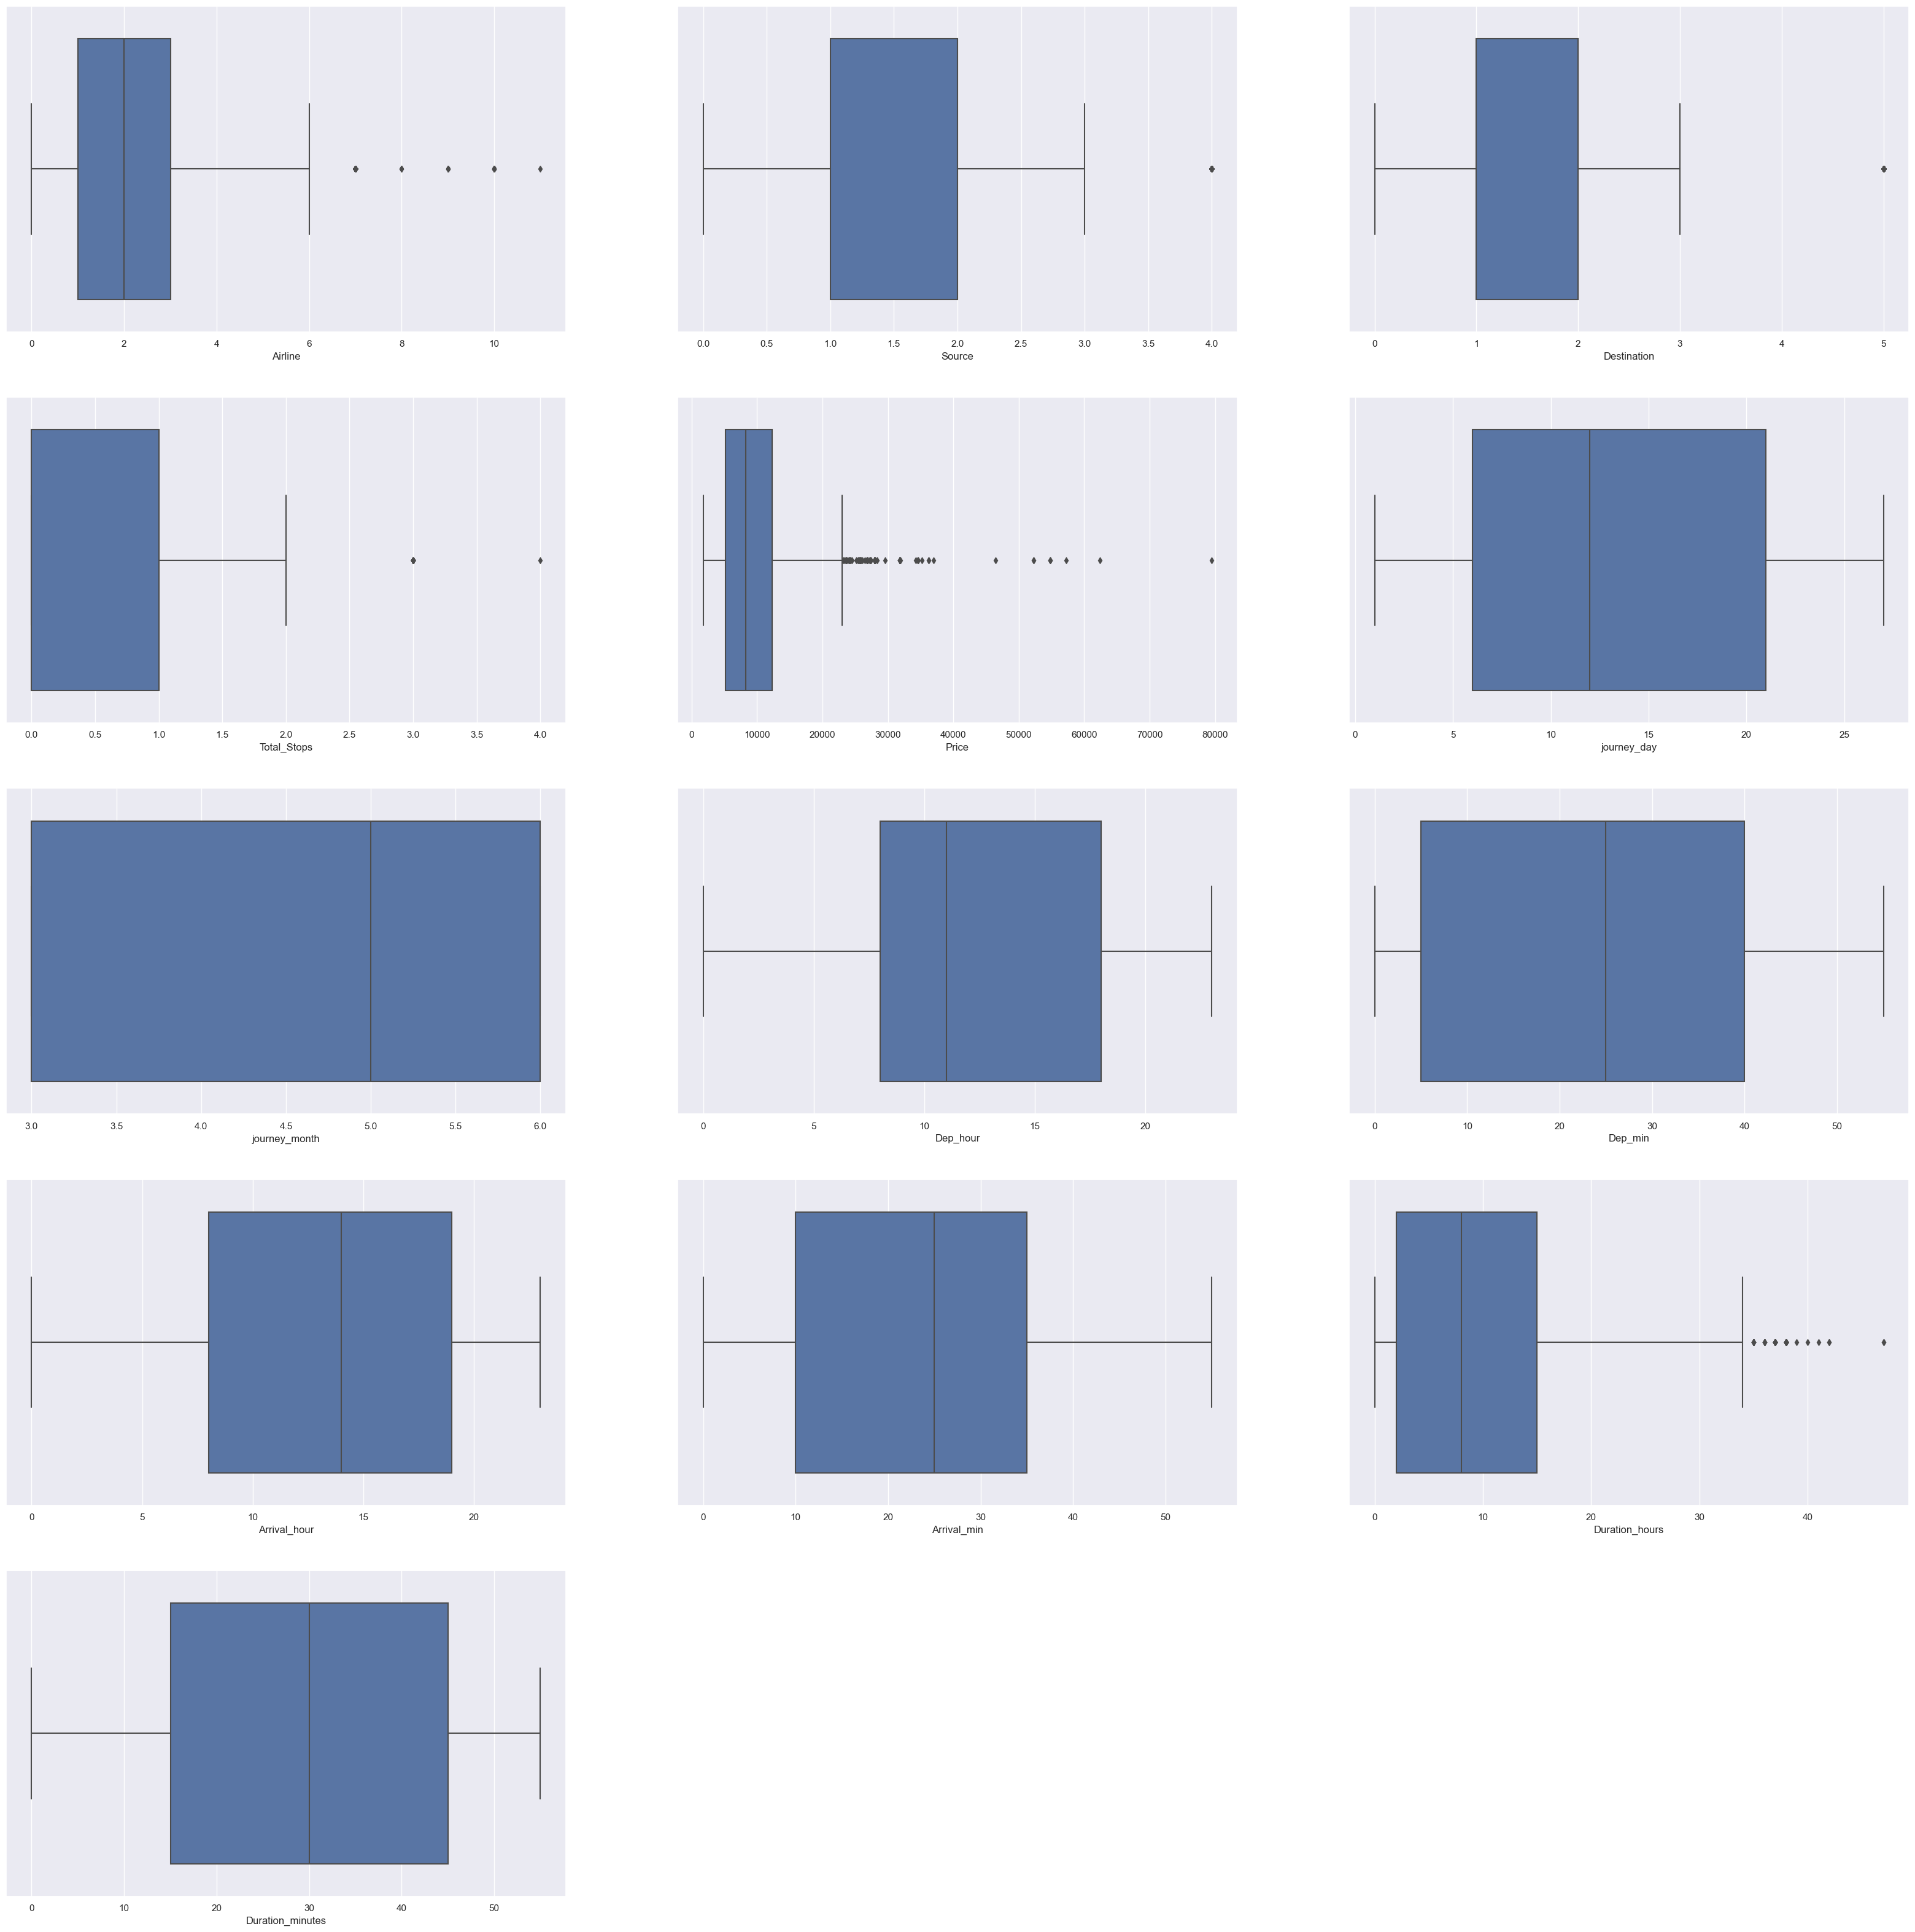

In [42]:
plt.figure(figsize = (40,40), facecolor = "white")
pltno=1

for col in flight_data:
    if pltno<=15:
        ax = plt.subplot(5,3,pltno)
        sns.boxplot(x = flight_data[col])
    pltno+=1
    
plt.show()

In [43]:
for column in flight_data:
    
  Q1 = flight_data[column].quantile(0.25)
  Q3 = flight_data[column].quantile(0.75)
    
  IQR = Q3 - Q1

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR

  flight_data.loc[flight_data[column]<lower_limit, column] = flight_data[column].median()
  flight_data.loc[flight_data[column]>upper_limit, column] = flight_data[column].median()

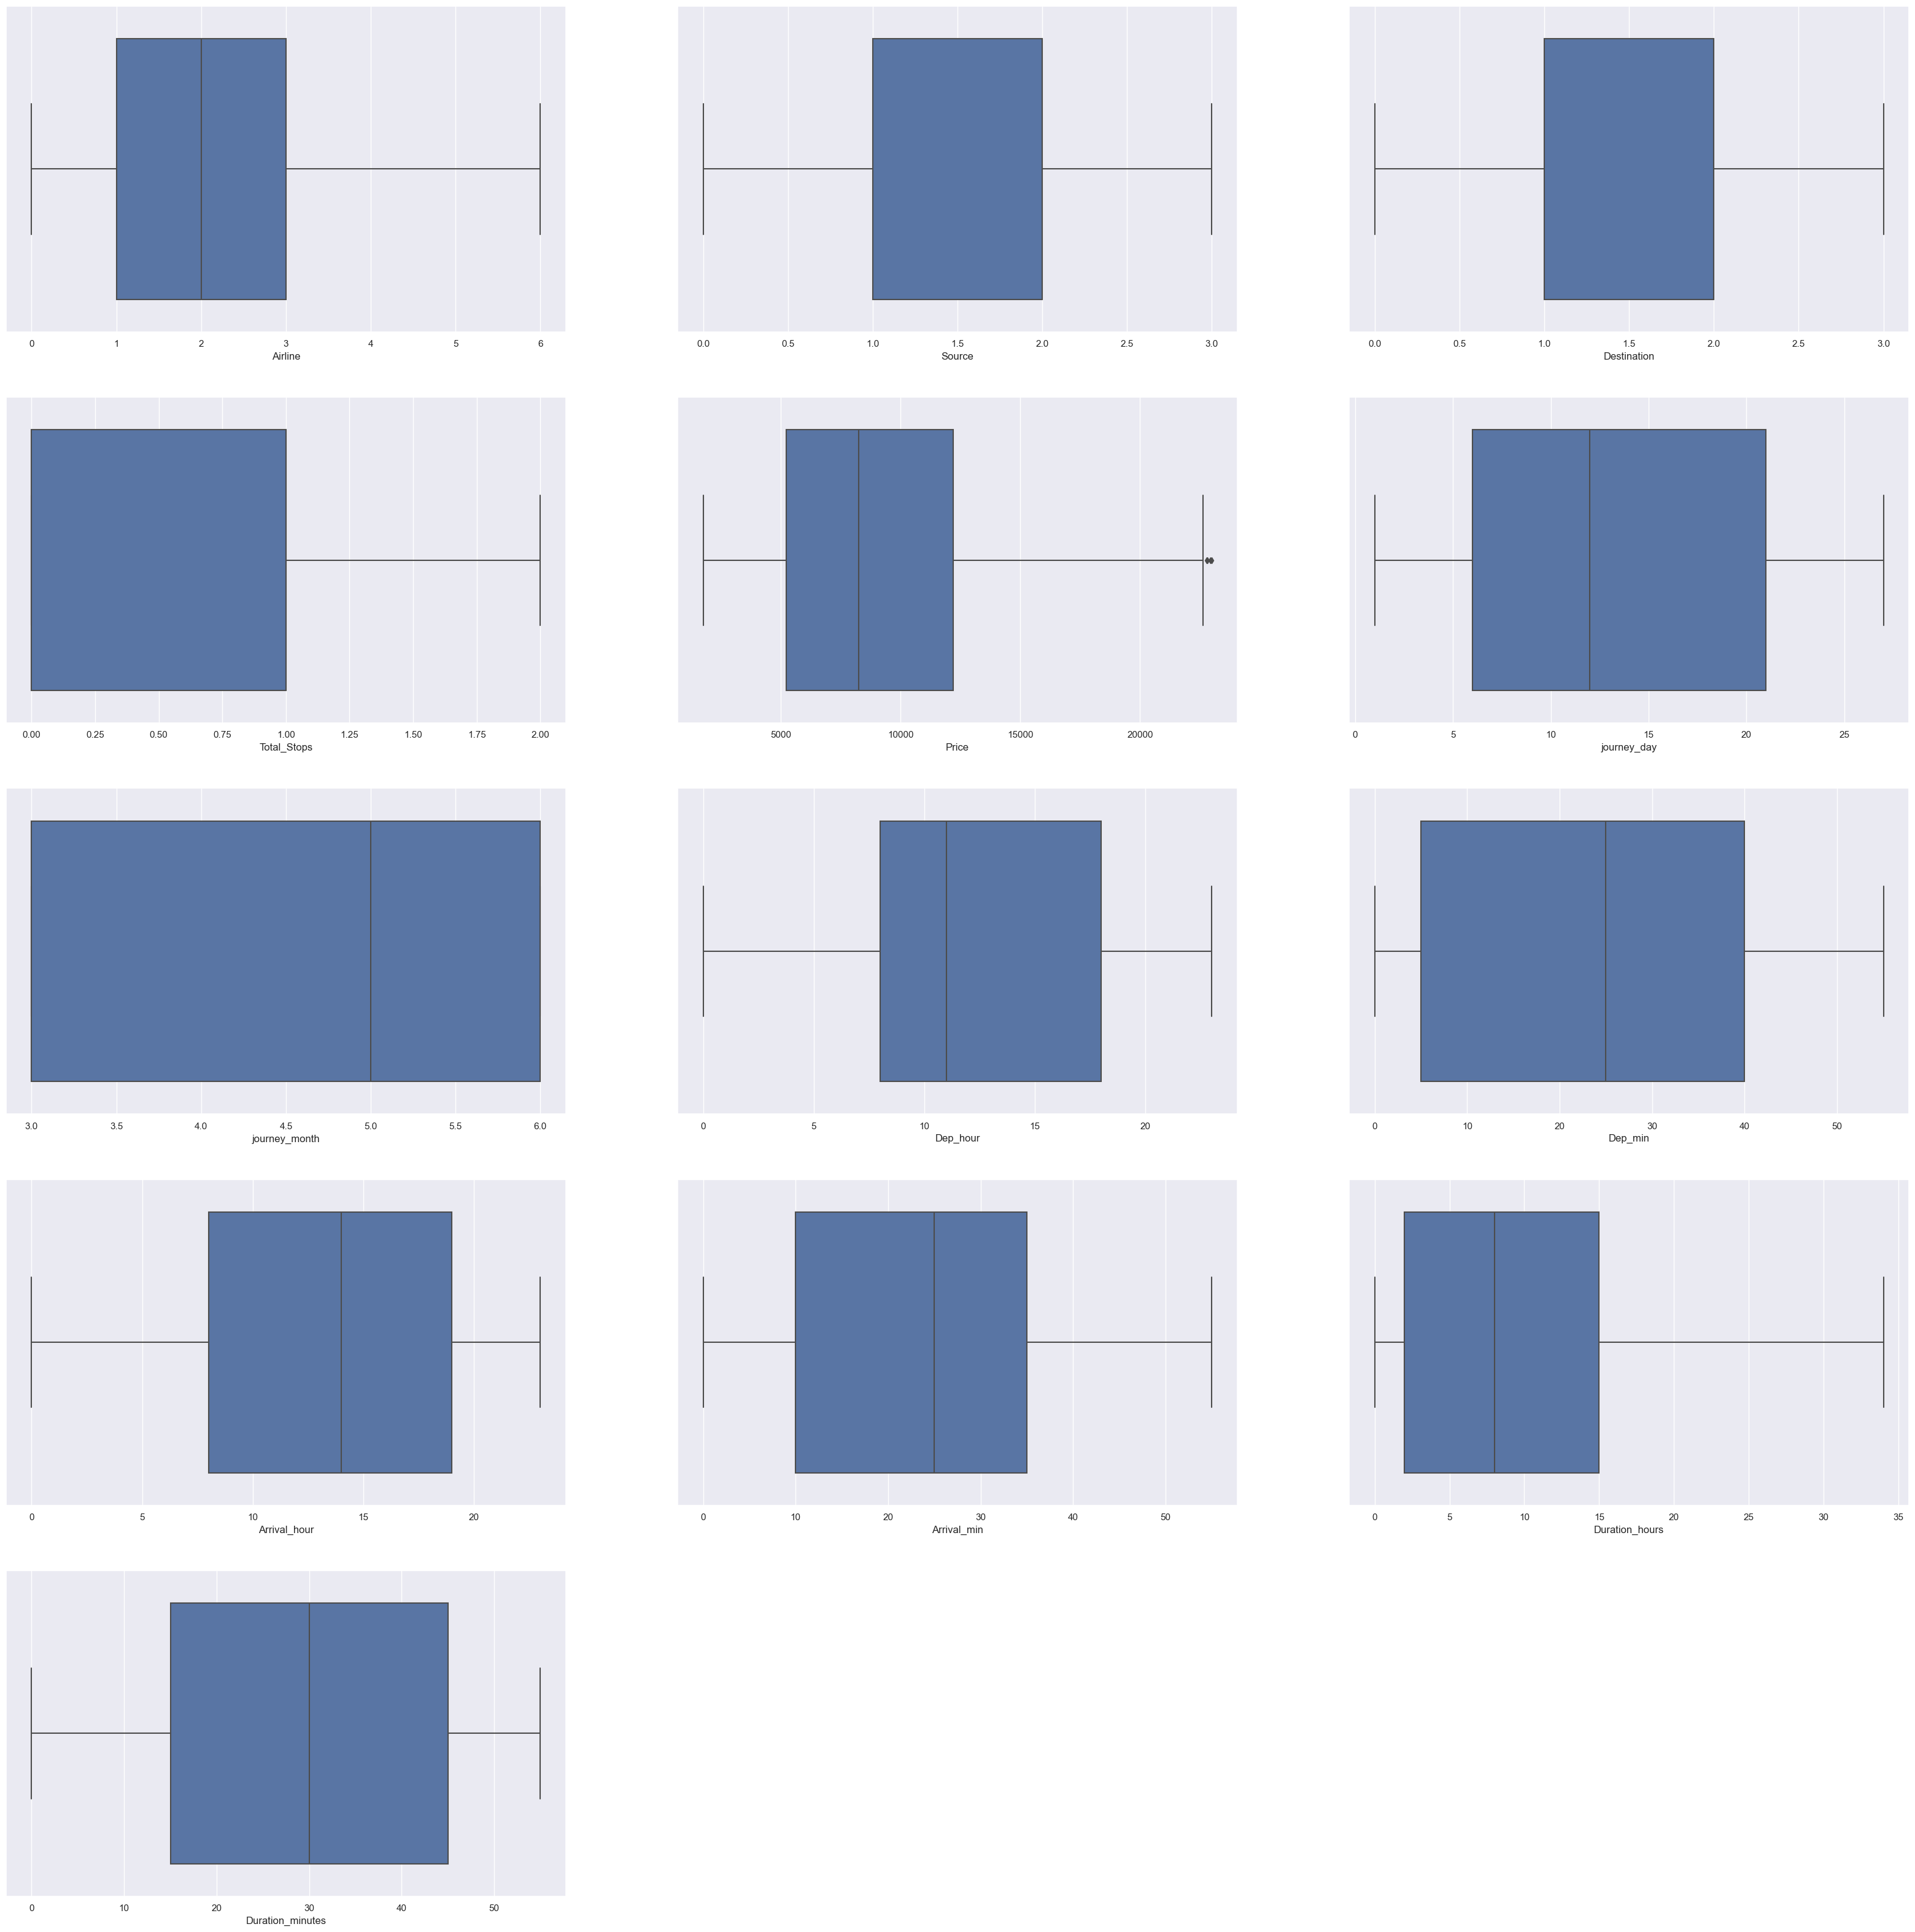

In [44]:
plt.figure(figsize=(40,40),facecolor = "white")
pltno=1

for col in flight_data:
    if pltno<=15:
        ax = plt.subplot(5,3,pltno)
        sns.boxplot(x = flight_data[col])
    pltno+=1
    
plt.show()

#### As we can see there are very minimal outliers which can be ignored

### Scaling The Data

In [45]:
scale = MinMaxScaler()

df1 = scale.fit_transform(flight_data.drop("Price", axis = 1))

In [46]:
flight_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [47]:
df = pd.DataFrame(df1, columns = ['Airline', 'Source', 'Destination', 'Total_Stops',
             'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
             'Arrival_min', 'Duration_hours', 'Duration_mins'])

In [48]:
df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0.000000,0.000000,0.000000,0.0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.058824,0.909091
1,0.166667,0.333333,0.333333,1.0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.205882,0.454545
2,0.333333,0.666667,0.666667,1.0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.558824,0.000000
3,0.000000,0.333333,0.333333,0.5,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.147059,0.454545
4,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.117647,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...
10455,0.333333,0.333333,0.333333,0.0,0.307692,0.333333,0.826087,1.000000,0.956522,0.454545,0.058824,0.545455
10456,0.166667,0.333333,0.333333,0.0,1.000000,0.333333,0.869565,0.818182,1.000000,0.363636,0.058824,0.636364
10457,0.333333,0.000000,0.000000,0.0,1.000000,0.333333,0.347826,0.363636,0.478261,0.363636,0.088235,0.000000
10458,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,0.058824,0.727273


# Feature Selection    

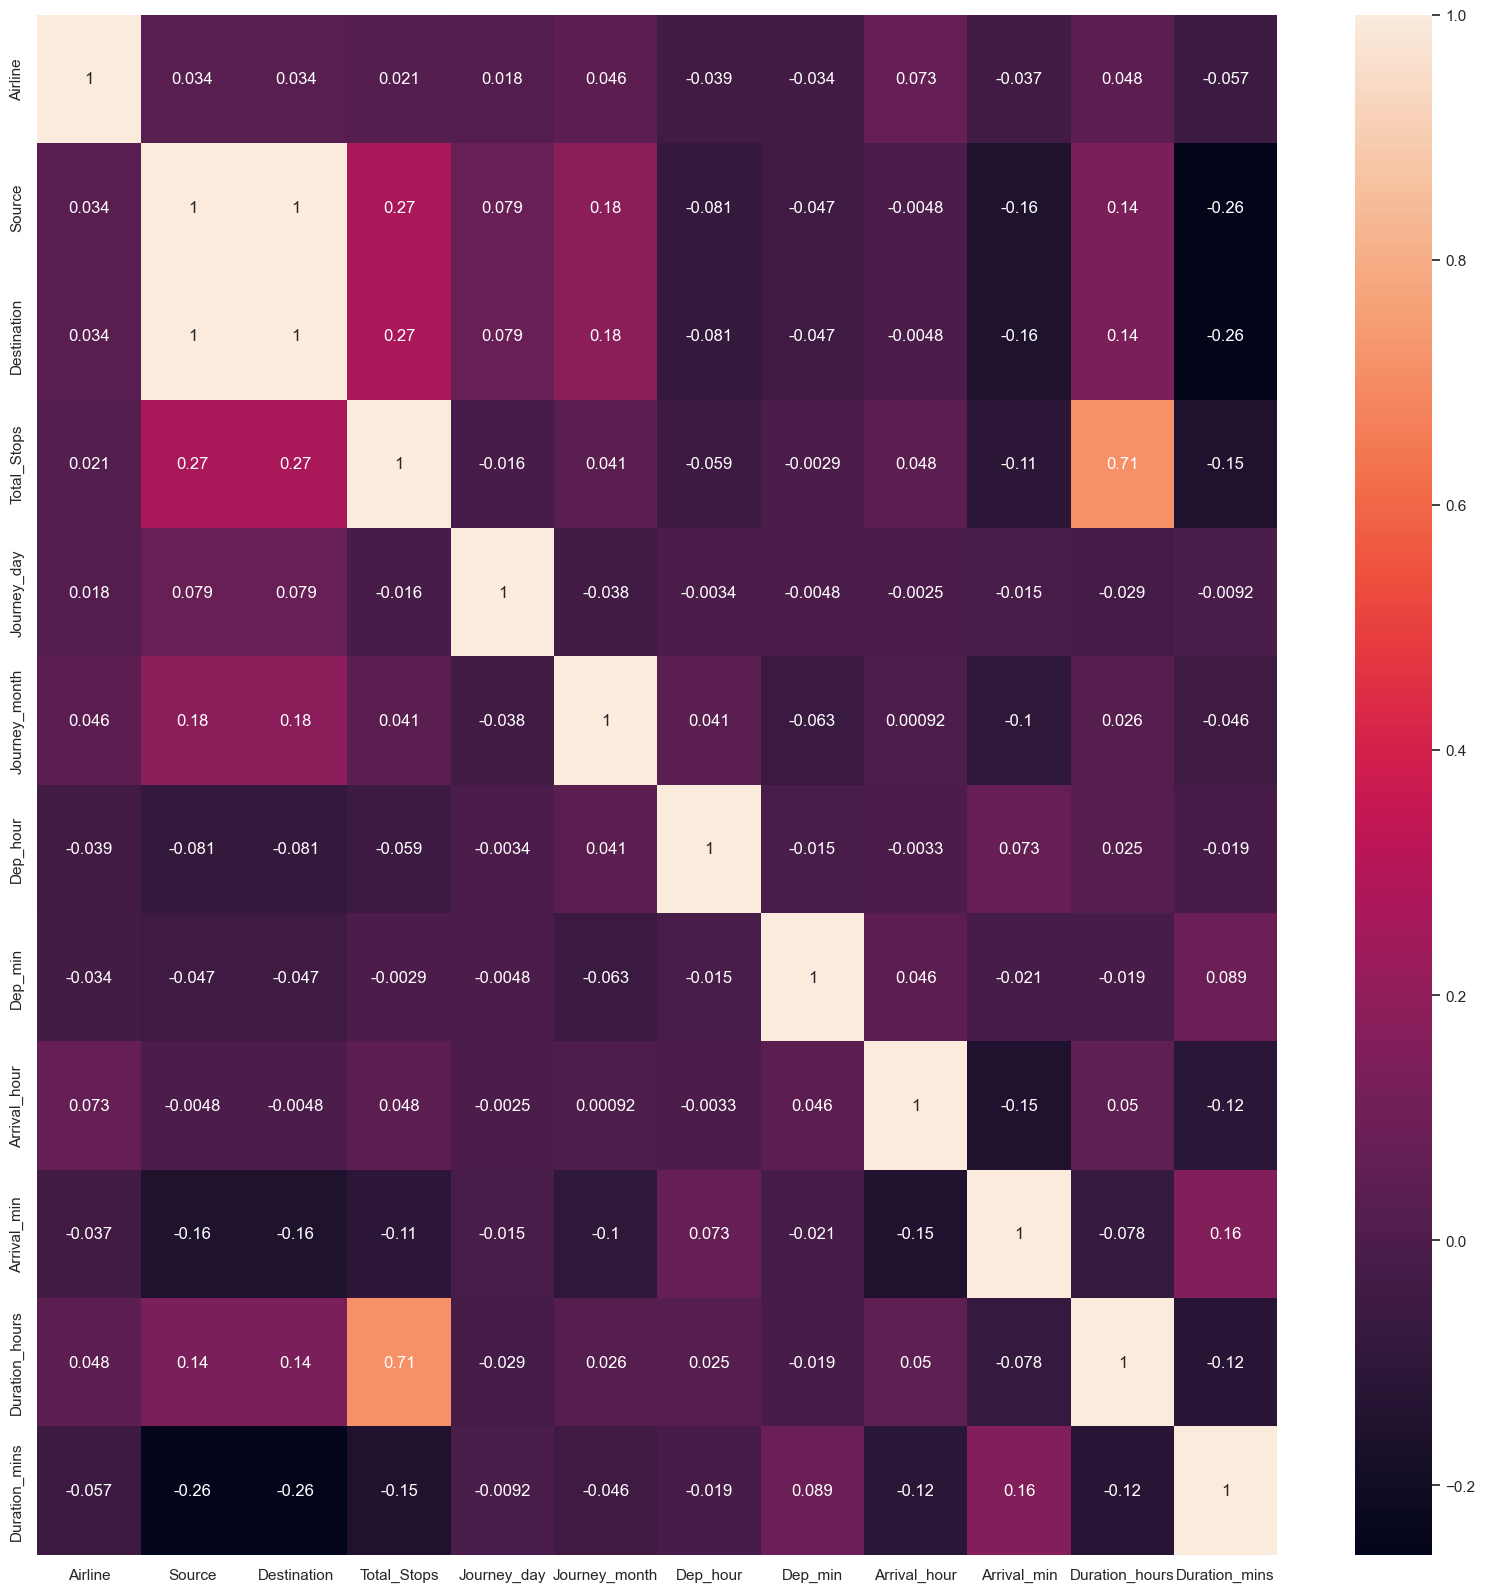

In [49]:
plt.figure(figsize = (20,20),facecolor = "white")

sns.heatmap(df.corr(), annot = True)

plt.show()

In [50]:
df.drop("Source", inplace = True, axis = 1)    # Dropping of Source column as it is highly correlated.

In [51]:
df

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0.000000,0.000000,0.0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.058824,0.909091
1,0.166667,0.333333,1.0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.205882,0.454545
2,0.333333,0.666667,1.0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.558824,0.000000
3,0.000000,0.333333,0.5,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.147059,0.454545
4,0.000000,0.000000,0.5,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.117647,0.818182
...,...,...,...,...,...,...,...,...,...,...,...
10455,0.333333,0.333333,0.0,0.307692,0.333333,0.826087,1.000000,0.956522,0.454545,0.058824,0.545455
10456,0.166667,0.333333,0.0,1.000000,0.333333,0.869565,0.818182,1.000000,0.363636,0.058824,0.636364
10457,0.333333,0.000000,0.0,1.000000,0.333333,0.347826,0.363636,0.478261,0.363636,0.088235,0.000000
10458,1.000000,0.000000,0.0,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,0.058824,0.727273


# TASK - 2

# MODEL BUILDING

In [52]:
x = df
y = flight_data["Price"]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [54]:
def adjusted_r_squared(r_squared, n, p):
    """
    Calculate the adjusted R-squared score.

    Parameters:
        r_squared (float) : The R-squared score.
        n (int) : Number of samples.
        p (int) : Number of predictors.

    Returns:
        float : The adjusted R-squared score.
    """
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    return adjusted_r2

def run_multiple_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, model in models.items():
        
        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate r2_score, mae & mse
        r2_score_value = r2_score(y_test, y_pred)
        
        mean_absolute_error_value = mean_absolute_error(y_test, y_pred)
        mean_squared_error_value = mean_squared_error(y_test, y_pred)

        # Calculate adjusted r2_score
        n = len(y_test)
        p = x_test.shape[1]
        
        adjusted_r2_score = adjusted_r_squared(r2_score_value, n, p)

        # Store results in the dictionary
        results[model_name] = {
            "r2_score" : r2_score_value,
            "mae" : mean_absolute_error_value,
            "mse" : mean_squared_error_value,
            "rmse" : np.sqrt(mean_squared_error_value),
            "adjusted_r2" : adjusted_r2_score
        }

    return results

# Define the models to run
model_to_run = {
    "LinearRegression" : LinearRegression(),
    "k-Neighbours Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor()
}

# Run the models
results = run_multiple_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"r2_score: {scores['r2_score']}")
    print(f"Adjusted r2_score: {scores['adjusted_r2']}")
    print(f"mean_absolute_error: {scores['mae']}")
    print(f"mean_squared_error: {scores['mse']}")
    print(f"Root Mean Squared Error (RMSE): {scores['rmse']}")
    print('=' * 30)

Model: LinearRegression
r2_score: 0.5129917866272085
Adjusted r2_score: 0.5109337419298974
mean_absolute_error: 2222.256286786145
mean_squared_error: 8084352.633273666
Root Mean Squared Error (RMSE): 2843.299603150126
Model: k-Neighbours Regressor
r2_score: 0.7305545618178051
Adjusted r2_score: 0.7294159141727785
mean_absolute_error: 1458.1318546845123
mean_squared_error: 4472803.287250478
Root Mean Squared Error (RMSE): 2114.9003019647234
Model: Decision Tree
r2_score: 0.6693046943079829
Adjusted r2_score: 0.6679072112643363
mean_absolute_error: 1368.9766347992352
mean_squared_error: 5489553.136829828
Root Mean Squared Error (RMSE): 2342.9795425546995
Model: RandomForestRegressor
r2_score: 0.7832756893004452
Adjusted r2_score: 0.782359835509552
mean_absolute_error: 1208.7268869721527
mean_squared_error: 3597630.807423774
Root Mean Squared Error (RMSE): 1896.742156283709
Model: XGBRegressor
r2_score: 0.8161614145907577
Adjusted r2_score: 0.815384532362751
mean_absolute_error: 1181.8359

# Model Comparison Report

In [55]:
pd.DataFrame(results).T

,r2_score,mae,mse,rmse,adjusted_r2
LinearRegression,0.512992,2222.256287,8.084353e+06,2843.299603,0.510934
k-Neighbours Regressor,0.730555,1458.131855,4.472803e+06,2114.900302,0.729416
Decision Tree,0.669305,1368.976635,5.489553e+06,2342.979543,0.667907
RandomForestRegressor,0.783276,1208.726887,3.597631e+06,1896.742156,0.782360
XGBRegressor,0.816161,1181.835920,3.051727e+06,1746.919193,0.815385


In [56]:
model = XGBRegressor()

In [57]:
params = {
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7],
    "gamma" : [0, 0.25, 0.5, 1.0],
    "learning_rate" : [0.01, 0.1, 0.25, 0.5],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "n_estimators" : [100, 150, 200, 250, 300],
    "subsample" : [0.6, 0.7, 0.8],
}

In [ ]:
grid_search = GridSearchCV(model, params, cv = 5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

print("Best parameters:", best_params)

In [ ]:
best_model = XGBRegressor(**best_params)
best_model.fit(x_train, y_train)

In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
y_pred_train = best_model.predict(x_train)

In [ ]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print("r2_score:", r2)
print("mse:", mse)
print("mae:", mae)
print("rmse:", rmse)


In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBRegressor(hyperparms) - Actual vs Predicted")
      
plt.show()

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
data1 = [["LinearRegression", acc_LinearRegression],
        ["Decision Tree", acc_DT],
        ["KNN", acc_KNN],
        ["XGBoost", acc_XGB],
        ["Random Forest", acc_RF]]

col_names1 = ["Algorithm", "Accuracy Score"]

print(tabulate(data1, headers = col_names1, tablefmt = "fancy_grid", floatfmt = ".2%"))

# CONCLUSION

Based on the evaluation of various regression models for predicting flight fares, it can be concluded that the XGBoost Regressor performs the best among the models tested. With an R-squared score of 0.816 and the lowest Root Mean Squared Error (RMSE) of 1747.70, the XGBoost Regressor demonstrates the highest level of accuracy and precision in predicting flight fares compared to other models such as Linear Regression, k-Neighbours Regressor, Decision Tree, and Random Forest Regressor.

Therefore, for effective flight fare prediction, utilizing the XGBoost Regressor model is recommended, as it can provide more reliable estimations, aiding airlines and travelers alike in making informed decisions regarding ticket pricing and itinerary planning.

# SUGGESTION 

This suggests that the features utilized by the XGBoost model are more effective in capturing the underlying patterns and relationships in the flight fare data. Therefore, for flight fare prediction tasks, employing the XGBoost Regressor would likely yield more reliable and accurate predictions, thus aiding in better decision-making for pricing and planning purposes within the airline industry.




